In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from platform import python_version
import rasterio
from rasterio.plot import show
import numpy as np

files = os.listdir()
file = files[0]
img = rasterio.open(file)
show(img)


ModuleNotFoundError: No module named 'rasterio'

In [16]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open(file) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[-8.727264, 41.143873], [-8.727264, 41.112323], [-8.644867, 41.112323], [-8.644867, 41.143873], [-8.727264, 41.143873]]]}


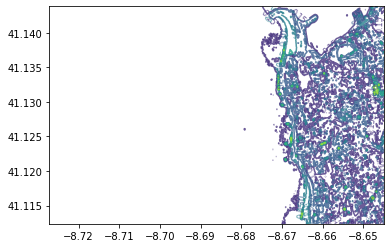

<AxesSubplot:>

In [32]:
src = rasterio.open(file)
from rasterio.plot import show
show((src, 3), contour=True, cmap="viridis", transform=src.transform)

In [44]:
b1 = src.read(1)
b2 = src.read(2)
b3 = src.read(3)

In [56]:
dx, dy = np.gradient(b1)
dd = dx + dy

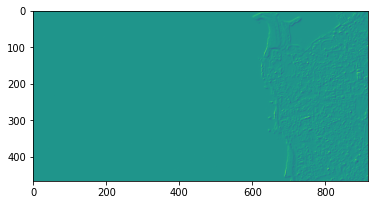

In [57]:
plt.imshow(dd)

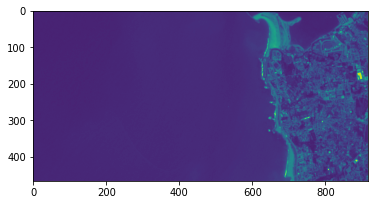

In [51]:
plt.imshow(b3)

In [23]:
plg.squeeze()

array([[-8.727264, 41.143873],
       [-8.727264, 41.112323],
       [-8.644867, 41.112323],
       [-8.644867, 41.143873],
       [-8.727264, 41.143873]])

In [26]:
with rasterio.open(file) as src:
    band1 = src.read(1)
    print('Band1 has shape', band1.shape)
    height = band1.shape[0]
    width = band1.shape[1]
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)
    lons= np.array(xs)
    lats = np.array(ys)
    print('lons shape', lons.shape)

Band1 has shape (466, 917)
lons shape (466, 917)


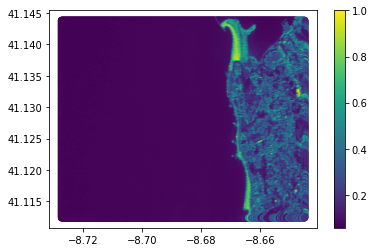

In [27]:
plt.scatter(lons, lats, c=band1)
plt.colorbar()

In [30]:
img = rasterio.open(file)

In [33]:
b1 = img.read()[0]
b2 = img.read()[1]
b3 = img.read()[2]

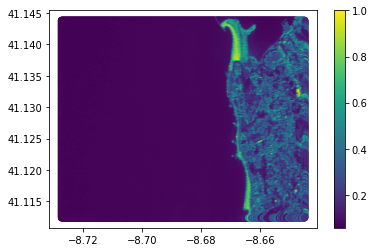

In [35]:
plt.scatter(lons, lats, c=b1)
plt.colorbar()


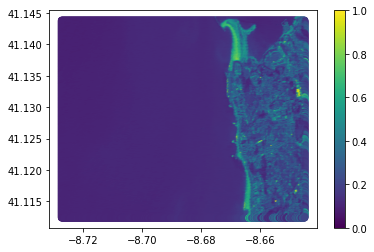

In [36]:
plt.scatter(lons, lats, c=b2)
plt.colorbar()

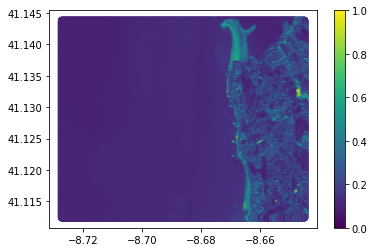

In [37]:
plt.scatter(lons, lats, c=b3)
plt.colorbar()